# Implementation de la classification binaire en utilisant l'argorithme KNN

### Les instructions:

1) Importation du dataset

2) Data preprocessing et du feature engineering

2) Réalisation des traitements nécessaires



### Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Importation du dataset 

In [2]:
path= 'C:/Users/MSIEA/Dataset.csv'
ds= pd.read_csv(path)

### Affichage des 20 premières lignes

In [3]:
ds.head(20)

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0
5,ID_1A9CVG5BBKRT,2022-01-13 09:07:32,27.58,18.92,26.1,57.0,1
6,ID_O598XNF3QQ7H,2021-12-18 02:25:06,43.62,34.62,20.6,86.0,1
7,ID_MUEQIKPY6X5O,2021-11-11 04:18:59,104.35,98.00,20.3,94.0,0
8,ID_YOGZ8Q8O97ON,2021-12-19 06:17:43,19.22,13.25,19.3,92.0,1
9,ID_FR804PILRAZ0,2022-01-01 16:19:02,2.02,5.22,27.1,66.0,0


# Phase de data preprocessing et du feature engineering

#### Visualisation de la structure du Dataset

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 297177 non-null  object 
 1   Datetime           297177 non-null  object 
 2   Sensor1_PM2.5      293563 non-null  float64
 3   Sensor2_PM2.5      293563 non-null  float64
 4   Temperature        293628 non-null  float64
 5   Relative_Humidity  293628 non-null  float64
 6   Offset_fault       297177 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ MB


#### Identification des valeurs manquantes

In [5]:
ds.isnull().sum()

ID                      0
Datetime                0
Sensor1_PM2.5        3614
Sensor2_PM2.5        3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

#### Affichage de toutes les colonnes du dataset

In [6]:
ds.columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault'],
      dtype='object')

#### La phase de sélection de colonnes et elémination des les lignes contenants des valeurs manquantes

In [7]:
ds = ds[['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity', 'Offset_fault']]
ds = ds.rename(columns={'Sensor1_PM2.5' : 'Sensor1', 'Sensor2_PM2.5':'Sensor2', 'Relative_Humidity':'Humidity'})
ds.dropna(axis=0, inplace=True)
ds.head(20)

,Sensor1,Sensor2,Temperature,Humidity,Offset_fault
0,52.58,49.52,17.4,96.0,0
1,35.25,33.40,25.0,75.0,0
2,19.18,23.50,24.9,75.0,0
3,19.40,15.48,24.9,70.0,0
4,38.30,34.77,20.9,89.0,0
5,27.58,18.92,26.1,57.0,1
6,43.62,34.62,20.6,86.0,1
7,104.35,98.00,20.3,94.0,0
8,19.22,13.25,19.3,92.0,1
9,2.02,5.22,27.1,66.0,0


#### Vérification des valeurs manquantes après les traitements

In [8]:
ds.isnull().sum()

Sensor1         0
Sensor2         0
Temperature     0
Humidity        0
Offset_fault    0
dtype: int64

#### La dimension actuelle du dataset

In [9]:
ds.shape

(290014, 5)

#### Visualisation de la structure du dataset après les traitements

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290014 entries, 0 to 297176
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Sensor1       290014 non-null  float64
 1   Sensor2       290014 non-null  float64
 2   Temperature   290014 non-null  float64
 3   Humidity      290014 non-null  float64
 4   Offset_fault  290014 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 13.3 MB


In [11]:
ds.dtypes

Sensor1         float64
Sensor2         float64
Temperature     float64
Humidity        float64
Offset_fault      int64
dtype: object

#### La description de chaque colonne du dataset

In [12]:
ds.describe()

,Sensor1,Sensor2,Temperature,Humidity,Offset_fault
count,290014.000000,290014.000000,290014.000000,290014.000000,290014.000000
mean,40.902043,38.318980,23.322738,78.614394,0.369468
std,28.598373,28.722693,3.841953,14.791905,0.482662
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.570000,19.620000,20.400000,68.000000,0.000000
50%,36.650000,33.850000,21.900000,84.000000,0.000000
75%,49.550000,47.700000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


#### Définition de la fonction de standardisation

In [13]:
def standard(x):
  return  (x -np.mean(x))/np.std(x)

#### Détermination de variable X comme feature et y target

In [14]:
X = ds.drop('Offset_fault', axis=1)
y = ds['Offset_fault']

#### Le contenu de X et sa dimension

In [15]:
X

,Sensor1,Sensor2,Temperature,Humidity
0,52.58,49.52,17.4,96.0
1,35.25,33.40,25.0,75.0
2,19.18,23.50,24.9,75.0
3,19.40,15.48,24.9,70.0
4,38.30,34.77,20.9,89.0
...,...,...,...,...
297172,36.40,37.77,28.6,62.0
297173,50.12,40.63,21.6,86.0
297174,53.68,45.23,20.2,94.0
297175,96.45,114.67,20.6,93.0


In [16]:
X.shape

(290014, 4)

#### Application de la standardisation aux features (Sensor1, Sensor2, Temperature, Relative_Himidity, offset_fault)

In [17]:
ds.iloc[:,:-1] = standard(ds)
print(ds)

         Sensor1   Sensor2  Temperature  Humidity  Offset_fault
0       0.408344  0.389972    -1.541598  1.175348             0
1      -0.197635 -0.171258     0.436566 -0.244350             0
2      -0.759557 -0.515934     0.410537 -0.244350             0
3      -0.751864 -0.795156     0.410537 -0.582373             0
4      -0.090986 -0.123560    -0.630602  0.702115             0
...          ...       ...          ...       ...           ...
297172 -0.157423 -0.019113     1.373591 -1.123211             0
297173  0.322325  0.080460    -0.448402  0.499301             1
297174  0.446808  0.240612    -0.812801  1.040139             1
297175  1.942350  2.658217    -0.708687  0.972534             0
297176  0.117768 -0.053929    -1.567627  1.107743             1

[290014 rows x 5 columns]


D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


#### La phase de test et d'entrainnement du modèle avec 20% de donnée pour le test et 80% pour l'entrainnement

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((232011, 4), (58003, 4), (232011,), (58003,))

#### L'appel de la fonction KNeighborsClassifier() de la bibliothèque sklearn.neighbors pour l'implémentation du modèle

In [19]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X,y)
y_pred = model_knn.predict(X_test)
model_knn.score(X,y)

0.9565779583054611

#### La définition d'une fonction permettant de prédire si un appareil est déffectueux (1) ou pas (0)

In [20]:
def defectueux(model_knn, Sensor1=52.25, Sensor2=93.40, Temperature=27.0, Relative_Humidity=95.0):
    x = np.array([Sensor1, Sensor2, Temperature, Relative_Humidity ]).reshape(1, 4)
    print(model_knn.predict(x))

In [21]:
defectueux(model_knn)

[0]


C:\Users\MSIEA\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### L'évaluation de la performance du modèle à travers certaines mesures

In [22]:
print('Exactitude :', accuracy_score(y_test, y_pred))
print('Précision :', precision_score(y_test, y_pred))
print('Rappel :', recall_score(y_test, y_pred))
print('Score F1 :', f1_score(y_test, y_pred))

Exactitude : 0.9559505542816751
Précision : 0.9410195197303749
Rappel : 0.9394803252640433
Score F1 : 0.9402492925796869


#### Calcule de la précision du modèle sur les données de test

In [23]:
accuracy = accuracy_score(y_test, y_pred)

#### Le tracé du nuage de points avec des  couleurs allant du rouge chaud pour des valeurs  qui sont pédites incorrectes  et au  bleu froid pour des valeurs qui sont prédites correctes

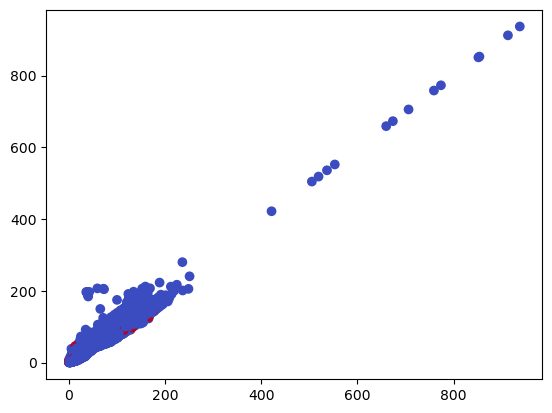

In [24]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred != y_test, cmap='coolwarm')

#### On costate que le modèle est un bon modèle (idéale) car sur la figure ci-dessus, il y a très peu de points rouge (valeurs mal prédites) et c'est totalement dominé par des points bleu (valeurs correctement prédites)